This week we will compute motion energy in a set of movies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform as skt
from skimage import color as skcol
%matplotlib inline

In the following several exercises, we will construct a motion energy Gabor filter! The equation for a motion energy Gabor function (which defines a motion energy Gabor filter) is:

## $G_{i,p}(x, y, t) = e^{-\frac{(x - cx_i)^2 + (y - cy_i)^2}{2 \sigma_{xy, i}^2} - \frac{(t-ct_i)^2}{2\sigma_{t, i}^2}} * sin((x-cx_i) * fx_i + (y-cy_i) * fy_i + (t-ct_i)ft_i + p)$

Let's break this down into parts: we have a 3D Gaussian (in red):
## <span style="color:red">$G_{i,p}(x, y, t) = e^{-\frac{(x - cx_i)^2 + (y - cy_i)^2}{2\sigma_{xy, i}^2} - \frac{(t-ct_i)^2}{2\sigma_{t, i}^2}}$</span>  *
...times a 3D grating (in blue):
## <span style="color:blue">$ sin((x-cx_i) * fx_i + (y-cy_i) * fy_i + (t-ct_i)ft_i + p)$</span>

Code up the Gaussian first! 

## Exercise 01: 
Define a function to make a 3D Gaussian. It should take parameters cx, cy, sigma_xy, and sigma_t, and should have default values for x, y, and t (which will define the visual and temporal spaces over which the Gaussian is defined). NOTE: by convention here, we will define t as being a linearly spaced variable from 0 to 1 over 10 frames (for the stimuli we will use, 10 frames / 15 frames/second = 0.6666 seconds worth of movie). 

So: 

```python
def make_3d_gauss(cx, cy, sigma_x, sigma_y, sigma_t, x=some_variable, y=some_variable, t=some_variable):
    gauss = 0 # Some math!
    return gauss
```

When you are done, you should have a stack of images (X x Y x Time), i.e. (96 x 96 x 10). Show each of these images in a separate subplot to see what you've generated! (hint: use `plt.subplots()` and `plt.imshow()`, or better still `ax.imshow()` from each of your subplot axes)

In [2]:
# Answser, a (function)
# Answer, a
xy_size = 96
t_size = 10
dx = np.linspace(0, 1, xy_size)
dy = np.linspace(0, 1, xy_size)
dt = np.linspace(0, 1, t_size)
ix, iy, it = np.meshgrid(dx, dy, dt)

def make_3d_gauss(cx, cy, sigma_xy, sigma_t, x=ix, y=iy, t=it):
    gauss = np.exp( -((x - cx)**2 + (y - cy)**2) / (2 * sigma_xy**2) - (t - 0.5)**2 / (2 * sigma_t**2))
    return gauss

In [3]:
gauss = make_3d_gauss(0.5, 0.5, 0.1, 0.3)

In [4]:
gauss.shape

(96, 96, 10)

## A couple ways to visualize what's going on:

Show one (x,y) pixel through time (near the center of the image

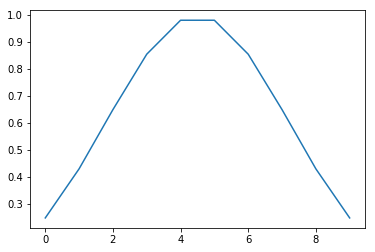

In [5]:
plt.plot(gauss[48, 48, :])

Show the full image over time. It's important to set the min and max for your color scale here (`vmin=..., vmax=...`), otherwise the differences in the Gaussians over time aren't apparent (because each time point is independently re-scaled by the `imshow()` command!)

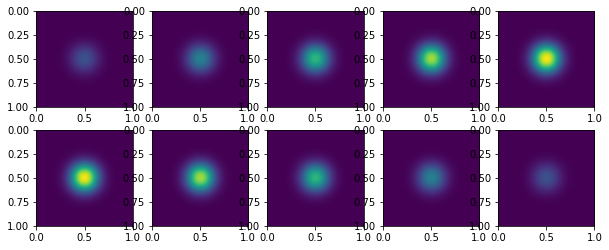

In [6]:
# Answer, b (plotting)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()): 
    ax.imshow(gauss[:,:,i], extent=(0, 1, 1, 0), vmin=0, vmax=1)

## Exercise 02: 
Make a 3D grating! As a reminder, here's the formula

## $ sin((x-cx_i) * fx_i + (y-cy_i) * fy_i + (t-ct_i)ft_i + p)$

$fx_i$ is the x frequency of the grating, which you should compute from the desired orientation of the grating; $fy_i$ is the y frequency of the grating, which you should compute from the desired orientation of the grating. See the example function below to show you how to compute those. Once again, ct will be 0.5, and t should range in value from 0 to 1.

So, your function should be of the form:

```python
def make_3D_grating(orientation, spatial_frequency, temporal_frequency, cx, cy, x=some_value, y=some_value, t=some_value):
    fx = -spatial_frequency * np.cos(orientation / 180 * np.pi) * 2 * np.pi
    fy = spatial_frequency * np.sin(orientation / 180 * np.pi) * 2 * np.pi
    ft = temporal_frequency * 2 * np.pi
    grat = 0 # some math!
    return grat
```



In [7]:
# Answer a (function)
def make_3D_grating(orientation, spatial_frequency, temporal_frequency, phase, cx, cy, 
                    x=ix, y=iy, t=it):
    '''phase is from 0-2pi'''
    fx = -spatial_frequency * np.cos(orientation / 180 * np.pi) * 2 * np.pi
    fy = spatial_frequency * np.sin(orientation / 180 * np.pi) * 2 * np.pi
    ft = temporal_frequency * 2 * np.pi
    grat = np.sin((x-cx) * fx + (y-cy) * fy + (t-0.5) * ft + phase)
    #grat = np.sin((ix - center_x) * fx + (iy - center_y) * fy + (it - 0.5) * ft + phase)
    return grat



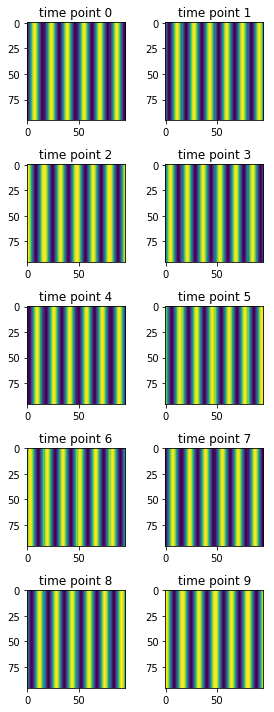

In [8]:
# Answer, b (plotting)
grat = make_3D_grating(0, 6, 2.6, 0, 0.5, 0.5)
fig, axs = plt.subplots(5, 2, figsize=(4,10))
for i, ax in enumerate(axs.flatten()): 
    ax.set_title('time point %d'%i)
    ax.imshow(grat[:,:,i], vmin=-1, vmax=1)
plt.tight_layout()

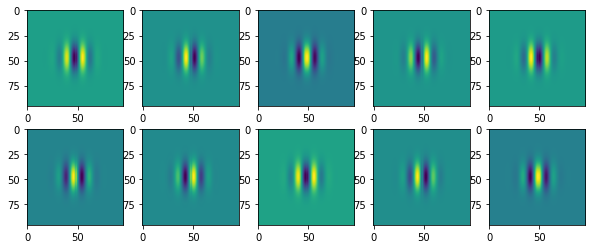

In [9]:
# Combine the gaussian and the grating to define the Gabor filter, and display it!  
gab = grat * gauss

fig, axs = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(gab[:,:,i].T)

# Multiply this Gabor by a stack of images

In [10]:
# Load images (these were part of the validation images used in Nishimoto et al 2011)
ims = np.load('/unrshare/LESCROARTSHARE/data_PSY763/natural_movie_450frames.npy')
# These are the spaitally downsampled , luminance channels only 
print(ims.shape)

(96, 96, 450)


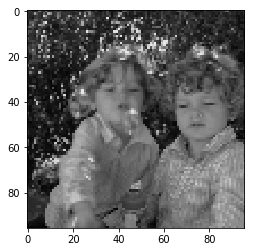

In [12]:
# play with me! (change frame)
frame = 33
plt.imshow(ims[:,:,frame], cmap='gray', vmin=0, vmax=100)

# Compute a response for first (valid) block of times
Multiply the array defining the Gabor filter with a chunk of images that is the same size, and take the sum of all values.

In [13]:
st = 0
fin = 10
resp = np.sum(gab * ims[:,:,st:fin])

## Exercise 03: 
Now compute this for all valid frames of the stimulus! (up to the point that the Gabor filter bumps up against the first / last movie frame). 

Plot the response!

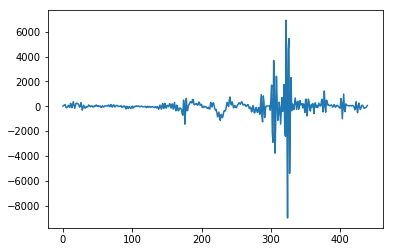

In [14]:
# Answer
resp = []
for frame in range(440):
    st = frame
    fin = frame + 10
    resp.append(np.sum(gab * ims[:,:,st:fin]))
# Convert to a numpy array:
resp = np.array(resp)
# and plot!
plt.plot(resp)

This is ALMOST but NOT QUITE the response of a motion energy filter over time. What's missing??

What has to be done finish the computation of motion energy? 

## Go back and add the missing component of the model! 

## Change the location, size, or temporal frequency of the filter and see what happens!